In [1]:
import re
import inspect
import itertools

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
styles = mpatches.ArrowStyle.get_styles()
ncol = 2
nrow = (len(styles) + 1) // ncol

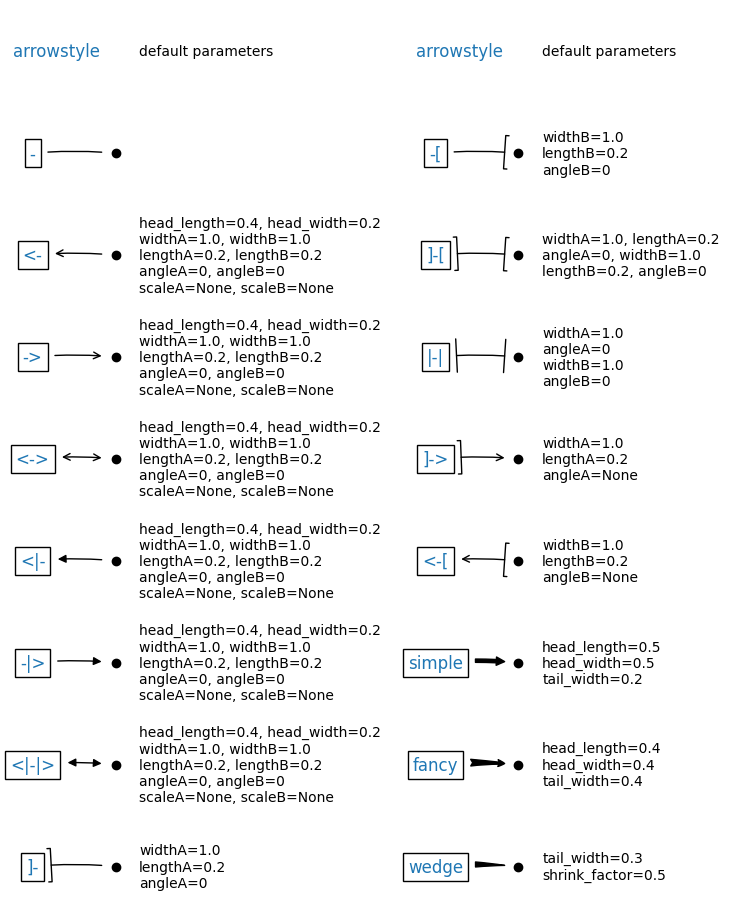

In [3]:
axs = (
    plt.figure(figsize=(4 * ncol, 1 + nrow)).add_gridspec(
        1 + nrow, ncol, wspace=0.7, left=0.1, right=0.9, bottom=0, top=1
    ).subplots()
)

for ax in axs.flat:
    ax.set_axis_off()

for ax in axs[0, :]:
    ax.text(
        0, 0.5, "arrowstyle", transform=ax.transAxes, size="large",
        color="tab:blue", ha="center", va="center",
    )
    ax.text(
        0.35, 0.5, "default parameters", transform=ax.transAxes, ha="left", va="center",
    )

for ax, (stylename, stylecls) in zip(axs[1:, :].T.flat, styles.items()):
    l, = ax.plot(0.25, 0.5, "ok", transform=ax.transAxes)
    ax.annotate(
        stylename, (0.25, 0.5), (-0.1, 0.5), xycoords="axes fraction",
        textcoords="axes fraction", size="large", color="tab:blue",
        ha="center", va="center", arrowprops={
            "arrowstyle": stylename, "connectionstyle": "arc3,rad=-0.05",
            "color": "k", "shrinkA": 5, "shrinkB": 5, "patchB": l,
        }, bbox={"boxstyle": "square", "fc": "w"},
    )
    
    # wrap at every nth comma (n = 1 or 2, depending on text length)
    s = str(inspect.signature(stylecls))[1:-1]
    n = 2 if s.count(",") > 3 else 1
    ax.text(
        0.35, 0.5, re.sub(
            ", ", lambda m, c = itertools.count(1): m.group()
            if next(c) % n else "\n", s
        ), transform=ax.transAxes, ha="left", va="center",
    )

plt.show()